In [100]:
import os
import cartopy.crs as ccrs
import sys
import glob
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import xarray as xr
import datetime
from pathlib import Path
import netCDF4
import matplotlib.dates as mdates
from fontTools.varLib.avarPlanner import normalizeDegrees

In [101]:
path_file= Path(r"C:\Users\vazqu\OneDrive - UQAM\UQAM\5e session\Laboratoire3\tp1\imerg_pr_201911_3h.nc4")

In [102]:

print(path_file)
ds_i = xr.open_dataset(path_file,engine="netcdf4")
#precipitation = ds_i['precipitationCal']
#lons = ds_i['lon']
#lats = ds_i['lat']
#temps = ds_i['time']


C:\Users\vazqu\OneDrive - UQAM\UQAM\5e session\Laboratoire3\tp1\imerg_pr_201911_3h.nc4


In [103]:
#Coordonne des villes souhaités
Kuala_cor= {"lat":3.1,"lon":101.6}
Montreal_cor={"lat":45.5,"lon":-73.5}
ocean_cor={"lat":5.0,"lon":106.0}
sevile_cor={"lat":37.4,"lon":-6}

In [104]:
#Prendre les data sets des coordonne les plus proches
kuala_ds = ds_i.sel(Kuala_cor,method='nearest')
mtl_ds = ds_i.sel(Montreal_cor,method='nearest')
ocean_ds = ds_i.sel(ocean_cor,method='nearest')
seville_ds = ds_i.sel(sevile_cor,method='nearest')

liste_nom_ville=["Kuala","MTL","Ocean","Seville"]


kuala_pand=kuala_ds.to_dataframe()
mtl_pand=mtl_ds.to_dataframe()
ocean_pand=ocean_ds.to_dataframe()
seville_pand=seville_ds.to_dataframe()


In [105]:
liste_ville=[kuala_pand,mtl_pand,ocean_pand,seville_pand]
liste_ville_n=[]
for ville in liste_ville:
    ville=ville.reset_index(level='bnds',drop=True)
    ville=ville.drop('time_bnds',axis=1)
    #ville.index=ville.index.strftime('%d-%H')
    ville.reset_index()
    ville=ville[~ville.index.duplicated(keep='first')]
    liste_ville_n.append(ville)



In [106]:
#print((liste_ville_n[1])['precipitationCal'].values)

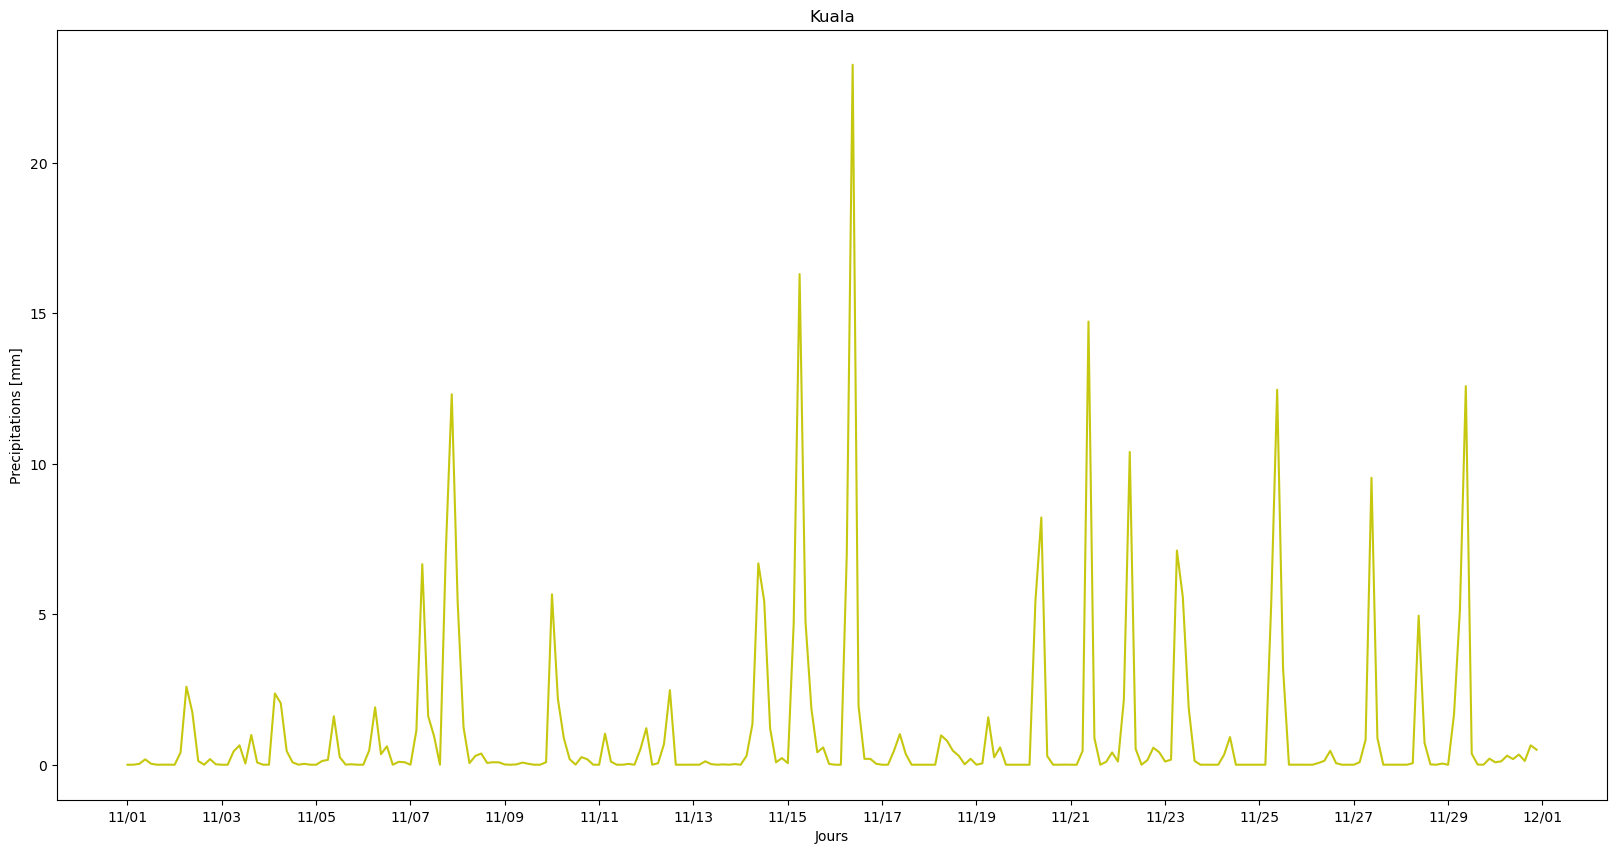

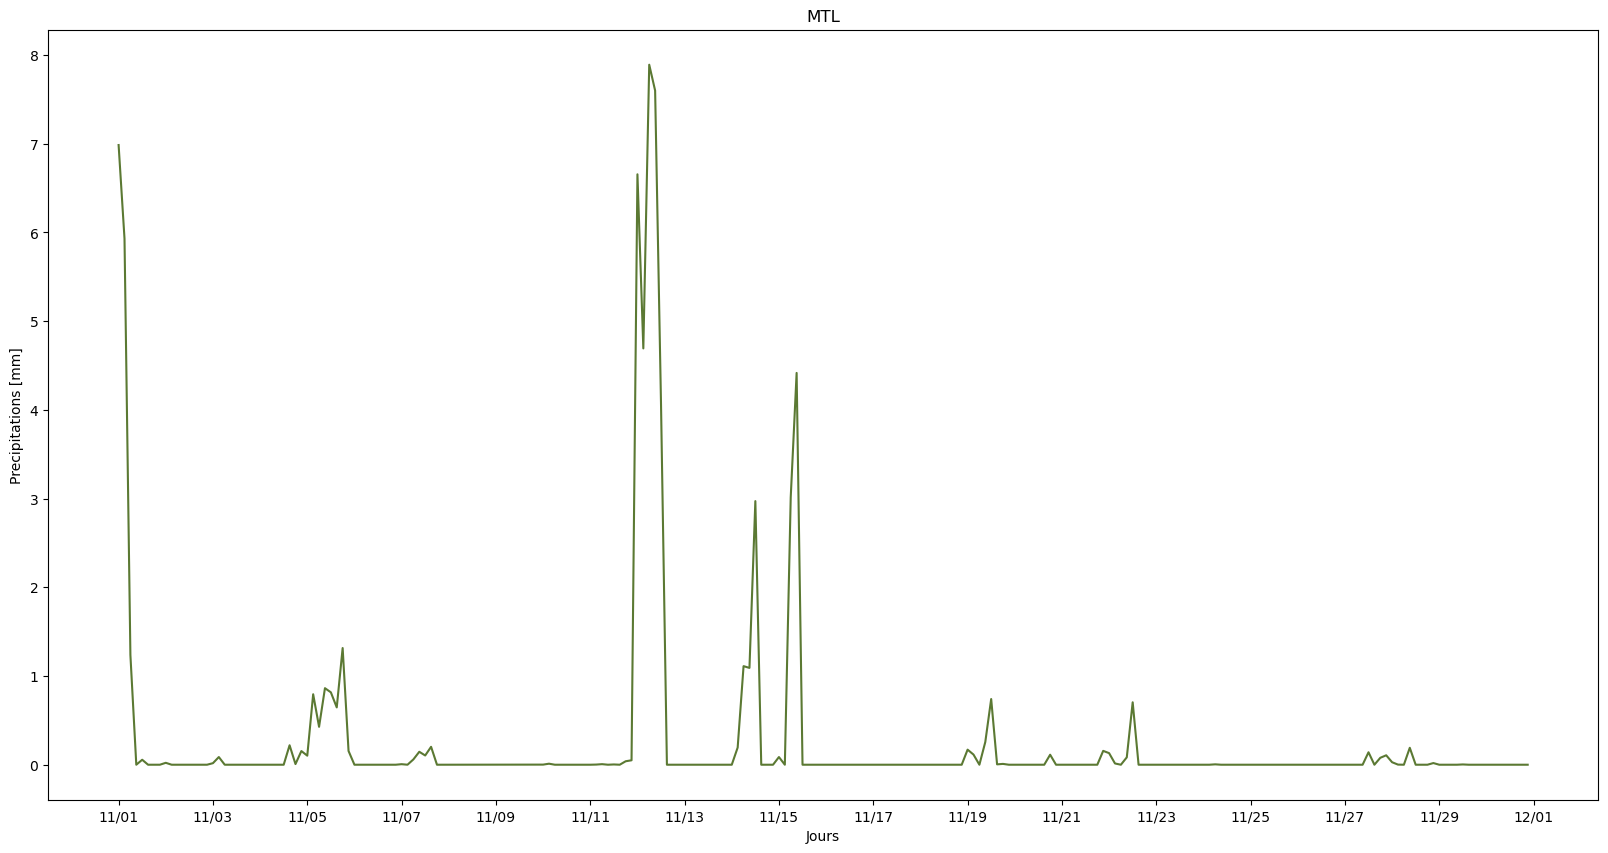

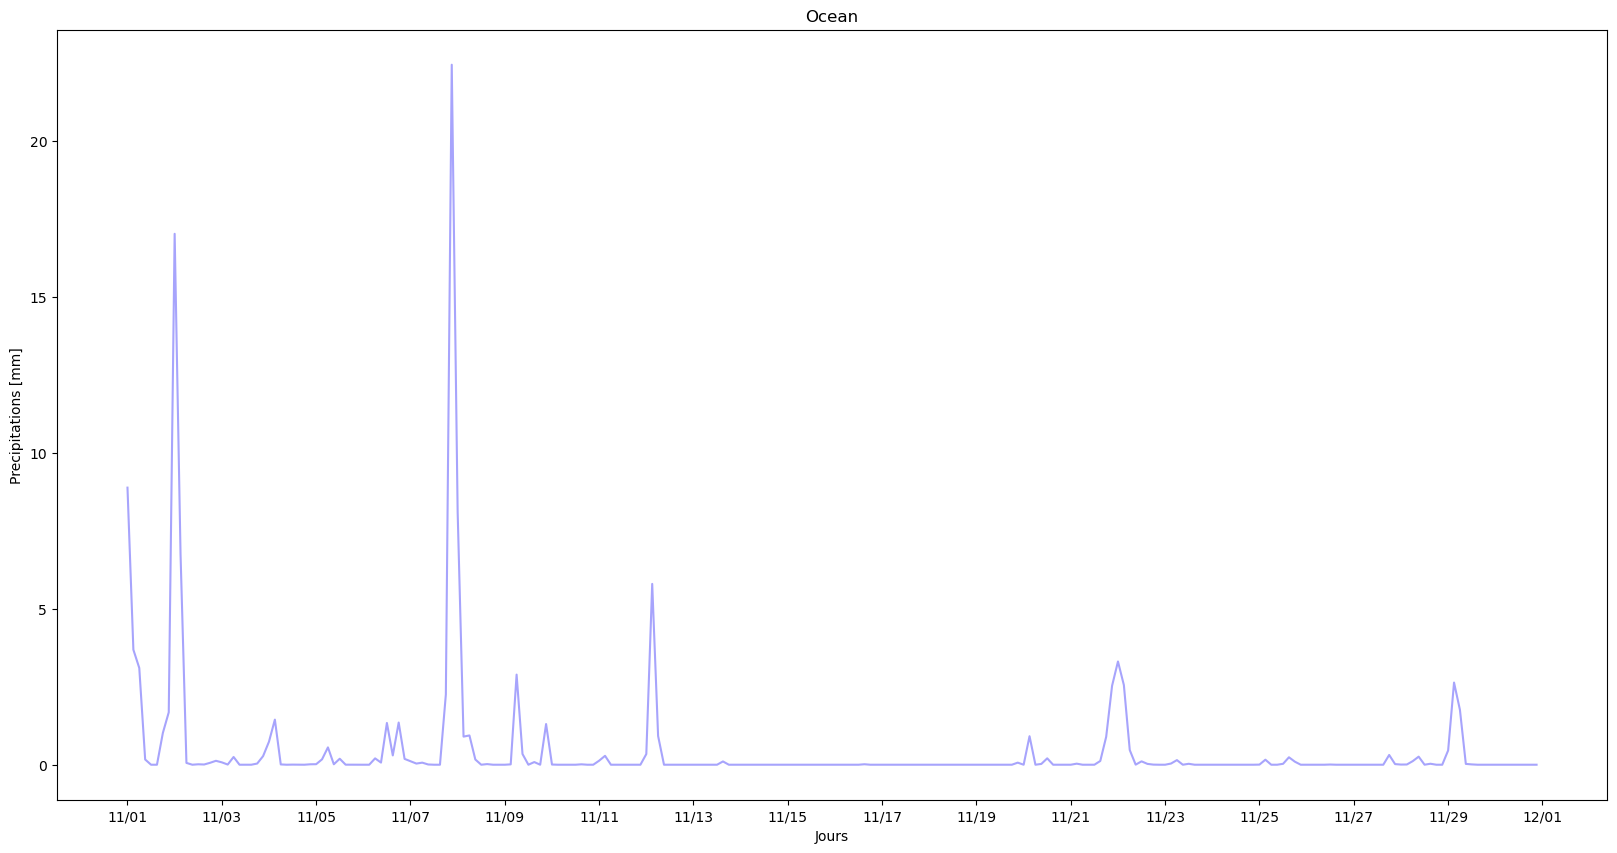

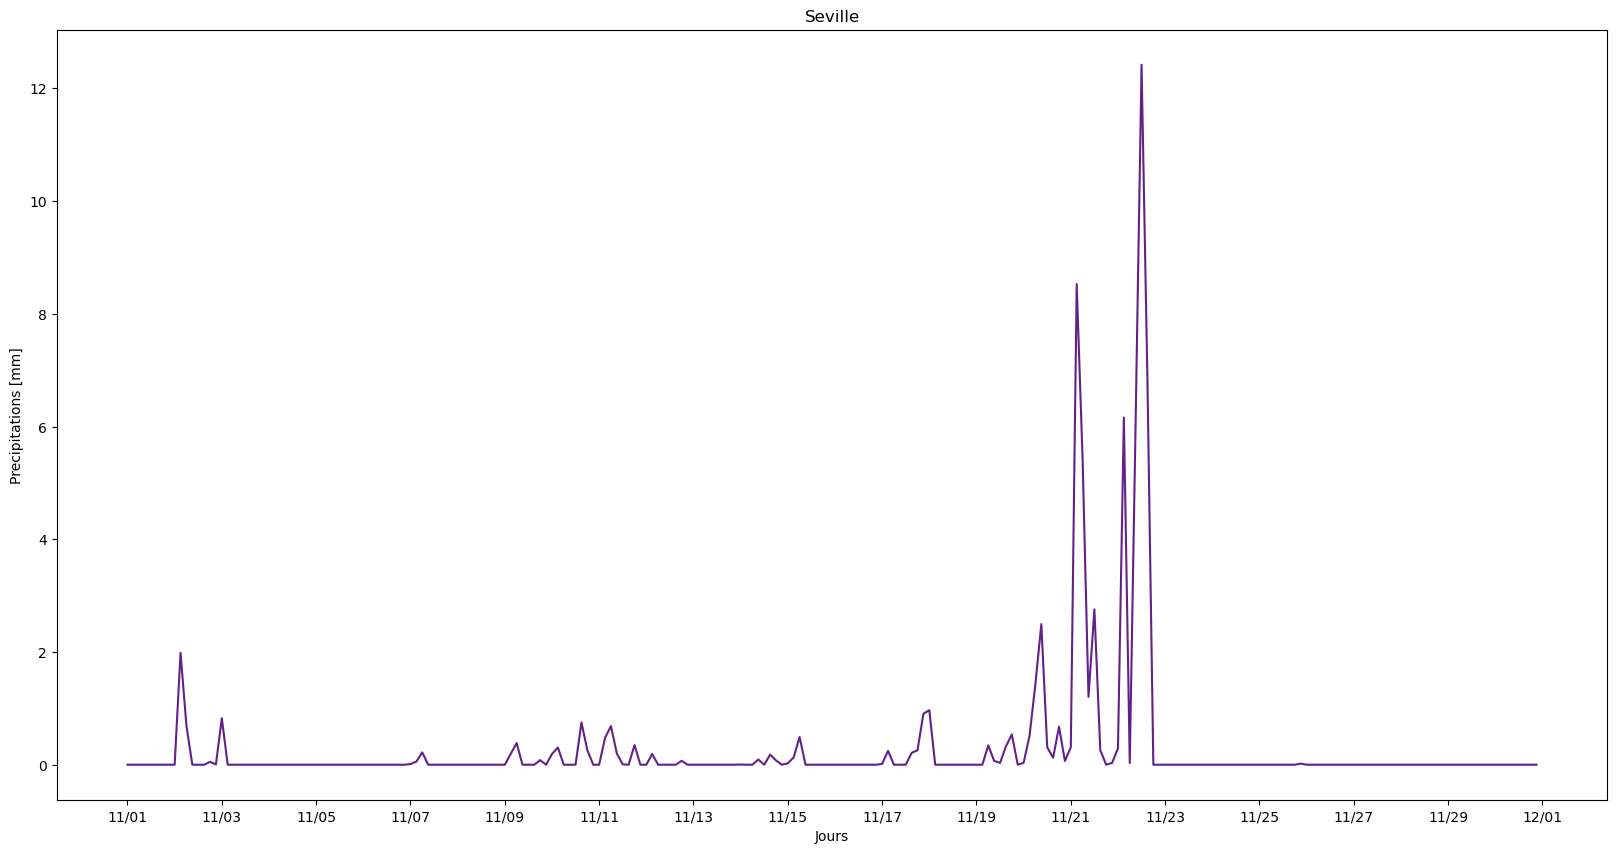

In [107]:
i=0
for ville in liste_ville_n:
    x=ville.index.values
    y=ville['precipitationCal'].values
    fig, ax = plt.subplots(1,1,figsize=(20,10))
    col=(np.random.random(), np.random.random(), np.random.random())
    ax.plot(x,y,c=col)
    ax.set_ylabel('Precipitations [mm]')
    ax.set_xlabel('Jours')
    ax.set_title(liste_nom_ville[i])
    i=i+1
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
    plt.show()

In [108]:
#3.a
#Somme des precipitations par ville
somme_precip=[]
for ville in liste_ville_n:
    somme_precip.append(round(float(ville['precipitationCal'].sum()),2))
print(liste_nom_ville)
print("Somme des precipitations :",somme_precip)

['Kuala', 'MTL', 'Ocean', 'Seville']
Somme des precipitations : [277.08, 67.31, 114.87, 68.89]


In [109]:
#3.b
#Nombre de donne de 3h avec plus de 0 mm de precipitations

nb_lignes_new=[]
nb_lignes_old=[]
fraction=[]
for ville in liste_ville_n:
    precipitation_mesure=ville[ville['precipitationCal']!=0]
    nb_lignes_old=(len(ville['precipitationCal']))
    nb_lignes_new.append(len(precipitation_mesure))
    fraction.append(round(len(precipitation_mesure)/len(ville['precipitationCal']),2))
    
print(liste_nom_ville)
print("Nombre de mesures avec precipitation ",nb_lignes_new)
print("Fréquence de précipitation [%]:",fraction)


['Kuala', 'MTL', 'Ocean', 'Seville']
Nombre de mesures avec precipitation  [167, 64, 97, 64]
Fréquence de précipitation [%]: [0.7, 0.27, 0.4, 0.27]


In [110]:
#3.c
#Precipitation moyenne et intensite de precipitation
precip_moyen=[]
intensite_precip=[]
for ville in liste_ville_n:
    precip_moyen.append(round(float(np.mean(ville['precipitationCal'].values)),2))
    intensite_precip.append(round(float(np.mean(ville[ville['precipitationCal']!=0].values)),2))
    
print(liste_nom_ville)
print("Precipitation moyenne : ",precip_moyen)
print("Intensité de précipitation moyenne : ",intensite_precip)

['Kuala', 'MTL', 'Ocean', 'Seville']
Precipitation moyenne :  [1.15, 0.28, 0.48, 0.29]
Intensité de précipitation moyenne :  [35.42, -8.95, 37.43, 10.86]


In [111]:
#3.d
#Evenement de precipitation

liste_dure_evenement=[]
total_compte=[]
for ville in liste_ville_n:
    precipitation=ville['precipitationCal'].values
    liste_ville_evenement=[]
    evenement=[]
    compte=0
    liste_compte=[]
    for i in range(len(precipitation)):
        if precipitation[i]>0:
            compte+=1
            evenement.append(float(precipitation[i]))
        else: 
            if evenement:
                liste_ville_evenement.append(evenement)
                liste_compte.append(compte)
                evenement=[]
                compte=0
    if evenement:
        liste_ville_evenement.append(evenement)
        liste_compte.append(compte)
        
    total_compte.append(liste_compte)
    liste_dure_evenement.append(liste_ville_evenement)

for i in range(4):
    print(liste_nom_ville[i])
    print('Compte des evenements : ',total_compte[i])
    print("Duree maximum evenement [h] : ", (np.max(total_compte[i]))*3,'\n')
    print('Evenement [mm]: ', liste_dure_evenement[i])
    print("\n")
    


Kuala
Compte des evenements :  [3, 1, 4, 2, 13, 6, 4, 7, 11, 3, 8, 2, 2, 2, 3, 3, 1, 1, 15, 7, 3, 6, 4, 3, 1, 3, 6, 9, 2, 4, 4, 5, 4, 1, 5, 9]
Duree maximum evenement [h] :  45 

Evenement [mm]:  [[0.028415871784090996, 0.1783340722322464, 0.03301599621772766], [0.002341238781809807], [0.40436798334121704, 2.5907649993896484, 1.7431056499481201, 0.12473034113645554], [0.18576455116271973, 0.013714153319597244], [0.44309917092323303, 0.6444153785705566, 0.03912729769945145, 0.989122211933136, 0.07284238189458847, 0.0011482491390779614, 0.001495187170803547, 2.36489200592041, 2.0433785915374756, 0.4572699964046478, 0.07814738899469376, 0.0018588707316666842, 0.030696334317326546], [0.12267531454563141, 0.1629858762025833, 1.6099307537078857, 0.25348779559135437, 0.004264270421117544, 0.014685400761663914], [0.4756576716899872, 1.9055620431900024, 0.349203497171402, 0.6128281950950623], [0.09629306197166443, 0.08246801048517227, 4.8439927923027426e-05, 1.1339071989059448, 6.6605544090271,

In [112]:
#3.e
#Valeur maximum de taux de precipitation
taux_max=[]
for ville in liste_ville_n:
    taux_max.append(ville['precipitationCal'].max())
print(liste_nom_ville)
print("Valeur de taux de precipitation maximum [mm]: ",taux_max)

['Kuala', 'MTL', 'Ocean', 'Seville']
Valeur de taux de precipitation maximum [mm]:  [23.24861717224121, 7.889941692352295, 22.457836151123047, 12.41816234588623]


In [120]:
#3.f
#Correlation temporelle
circonferenc_polaire=40008
for ville in liste_ville_n:
    lat_ville=ville['lat'].values[1]
    long_ville=ville['lon'].values[1]
    print(lat_ville,long_ville)
    delta_lat = jj
    nord=

3.05 101.55
45.55 -73.45
5.05 106.05
37.45 -5.95


In [121]:
import math
from typing import Tuple, Dict, List

# Rayon moyen de la Terre en kilomètres (WGS84 ~6371.0088 km)
R_EARTH_KM = 6371.0088

def destination_point(lat_deg: float, lon_deg: float, bearing_deg: float, distance_km: float) -> Tuple[float, float]:
    """
    Calcule le point de destination sur une sphère à partir d'un point (lat, lon),
    d'un azimut (bearing) en degrés et d'une distance en km.
    Formules 'direct problem' (sphère) :
      φ2 = asin( sin φ1 * cos δ + cos φ1 * sin δ * cos θ )
      λ2 = λ1 + atan2( sin θ * sin δ * cos φ1, cos δ − sin φ1 * sin φ2 )
    où δ = distance / R
    """
    lat1 = math.radians(lat_deg)
    lon1 = math.radians(lon_deg)
    theta = math.radians(bearing_deg)
    delta = distance_km / R_EARTH_KM

    sin_lat1 = math.sin(lat1)
    cos_lat1 = math.cos(lat1)
    sin_delta = math.sin(delta)
    cos_delta = math.cos(delta)
    cos_theta = math.cos(theta)
    sin_theta = math.sin(theta)

    sin_lat2 = sin_lat1 * cos_delta + cos_lat1 * sin_delta * cos_theta
    lat2 = math.asin(sin_lat2)

    y = sin_theta * sin_delta * cos_lat1
    x = cos_delta - sin_lat1 * sin_lat2
    lon2 = lon1 + math.atan2(y, x)

    # Normalisation de la longitude dans [-180, 180]
    lon2 = (lon2 + math.pi) % (2 * math.pi) - math.pi

    return math.degrees(lat2), math.degrees(lon2)

def four_cardinal_points(lat: float, lon: float, distance_km: float) -> Dict[str, Tuple[float, float]]:
    """
    Retourne les 4 points cardinaux (N, E, S, O) à 'distance_km' du point (lat, lon).
    Azimuts (degrés) : Nord=0, Est=90, Sud=180, Ouest=270
    """
    bearings = {
        "north": 0.0,
        "east": 90.0,
        "south": 180.0,
        "west": 270.0,
    }
    return {k: destination_point(lat, lon, b, distance_km) for k, b in bearings.items()}

def main():
    # Distance demandée
    distance_km = 50.0

    # Tes points (lat, lon)
    points: List[Tuple[float, float]] = [
        (3.05, 101.55),
        (45.55, -73.45),
        (5.05, 106.05),
        (37.45, -5.95),
    ]

    # Affichage
    for i, (lat, lon) in enumerate(points, 1):
        cardinals = four_cardinal_points(lat, lon, distance_km)
        print(f"Point {i}: lat={lat:.6f}, lon={lon:.6f}  |  +/- {distance_km} km")
        for dir_name in ["north", "south", "east", "west"]:
            plat, plon = cardinals[dir_name]
            print(f"  {dir_name:>5}: lat={plat:.6f}, lon={plon:.6f}")
        print()

if __name__ == "__main__":
    main()


Point 1: lat=3.050000, lon=101.550000  |  +/- 50.0 km
  north: lat=3.499660, lon=101.550000
  south: lat=2.600340, lon=101.550000
   east: lat=3.049906, lon=102.000298
   west: lat=3.049906, lon=101.099702

Point 2: lat=45.550000, lon=-73.450000  |  +/- 50.0 km
  north: lat=45.999660, lon=-73.450000
  south: lat=45.100340, lon=-73.450000
   east: lat=45.548201, lon=-72.807905
   west: lat=45.548201, lon=-74.092095

Point 3: lat=5.050000, lon=106.050000  |  +/- 50.0 km
  north: lat=5.499660, lon=106.050000
  south: lat=4.600340, lon=106.050000
   east: lat=5.049844, lon=106.501412
   west: lat=5.049844, lon=105.598588

Point 4: lat=37.450000, lon=-5.950000  |  +/- 50.0 km
  north: lat=37.899660, lon=-5.950000
  south: lat=37.000340, lon=-5.950000
   east: lat=37.448649, lon=-5.383602
   west: lat=37.448649, lon=-6.516398

